In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X,y=make_blobs(centers=2,random_state=42)

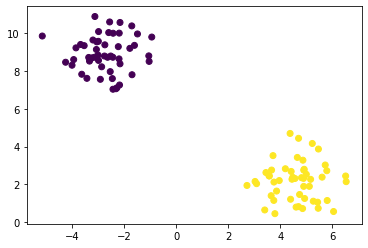

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
model=KNeighborsClassifier()

In [7]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
model.predict(X_test[:10])

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [9]:
y[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [16]:
data=np.load("./datasets/mnist_train_small.npy")

In [17]:
data.shape

(19999, 785)

In [18]:
X=data[:,1:]

In [19]:
X.shape

(19999, 784)

In [20]:
y=data[:,0]

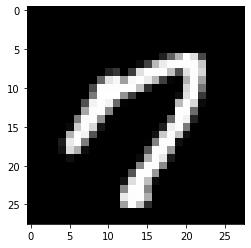

In [21]:
plt.imshow(X[1].reshape(28,28),cmap="gray")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [33]:
class customKnn:
    
    def __init__(self,neigh=5):
        self.neigh=neigh
        
    def fit(self,x,y):
        self.X=(x-x.mean())/x.std()
        self.y=y
    
    def predict_point(self,point):
        distances=[]
        
        for xd,yd in zip(self.X , self.y):
            distance=np.sum((xd-point)**2)
            distances.append([distance,yd])
            
        sort=sorted(distances)[:self.neigh]
        ans ,count =np.unique(np.array(sort)[:,1],return_counts=True)
        max_index=np.argmax(count)
        return ans[max_index]
    
    def predict(self,X):
        X=(X-X.mean())/X.std()
        result=[]
        for ele in X:
            result.append(self.predict_point(ele))
        return np.array(result)
    
    def score(self,X,y):
        return (self.predict(X)==y).mean()

In [34]:
z=customKnn()

In [35]:
z.fit(X_train,y_train)

In [36]:
z.predict(X_test[:10])

array([1., 7., 0., 9., 4., 5., 4., 6., 9., 2.])

In [37]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [38]:
z.score(X_test[:100],y_test[:100])

0.95

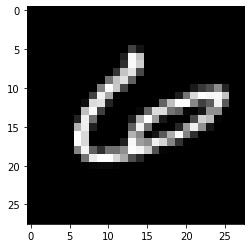

In [39]:
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')

In [40]:
import numpy as np

In [41]:
a=np.array([[1,2,3,4,4],[3,3,3,3,5]]).reshape(5,2)

In [42]:
a.shape[1]

2